# Clustering Music Genres with Machine Learning
Unsupervised clustering represents a powerful machine learning method for organizing data points that share common attributes. The classification of musical genres involves categorizing songs according to their acoustic properties and audio features. This tutorial will guide you through implementing a music genre clustering solution using Python and machine learning algorithms.

<div align="center">
<img src="https://static.vecteezy.com/system/resources/thumbnails/024/295/098/small_2x/music-notes-background-illustration-ai-generative-free-photo.jpg" />
</div>

## Music Genre Classification (Project Overview)
Individual musical preferences vary significantly across different people. Determining someone's musical taste cannot be accurately predicted solely from their personal background, interests, or career choices. This presents a significant challenge for music recommendation systems in streaming platforms. However, by analyzing a user's listening history and patterns, we can identify commonalities among their preferred tracks and suggest similar musical content.

This is precisely where music genre clustering becomes valuable. In this project, you'll work with a comprehensive Spotify dataset featuring popular tracks, including artist information, song titles, and detailed audio feature measurements. The objective is to categorize music genres by identifying patterns and similarities in their acoustic characteristics.

The dataset is available for download [here](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset).

## Notebook Overview

This notebook demonstrates how to use unsupervised machine learning to cluster music genres based on acoustic features from Spotify data. The project follows a complete data science workflow:

1. **Data Loading & Exploration** - Load and analyze a dataset of 1,994 popular songs
2. **Data Preprocessing** - Clean and prepare features for machine learning
3. **Model Building** - Implement K-Means clustering with optimal cluster selection
4. **Model Evaluation** - Assess clustering quality using silhouette analysis
5. **Model Deployment** - Save the trained pipeline for future use

**Key Learning Outcomes:**
- Understanding unsupervised learning applications in music analysis
- Implementing clustering algorithms with scikit-learn
- Building production-ready ML pipelines
- Applying data preprocessing techniques for mixed data types

## 1. Importing Libraries
First, let's import the necessary libraries for data manipulation, visualization, and machine learning.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings

### Configuration
Let's configure the necessary settings.
- Ignore warnings for cleaner output.
- Display up to 100 columns for better visibility.
- Set default figure size to 12x8 inches for plots.
- Use seaborn's 'darkgrid' style for improved plot aesthetics.

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Data Loading
We will load the data using pandas and take a quick look at its structure.

In [3]:
df = pd.read_csv('Spotify-2000.csv', index_col=0)

In [4]:
df.head()

Title             Artist            Top Genre  Year  \
Index                                                                         
1                     Sunrise        Norah Jones      adult standards  2004   
2                 Black Night        Deep Purple           album rock  2000   
3              Clint Eastwood           Gorillaz  alternative hip hop  2001   
4               The Pretender       Foo Fighters    alternative metal  2007   
5      Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

       Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
Index                                                                          
1                         157      30            53            -14        11   
2                         135      79            50            -11        17   
3                         168      69            66             -9         7   
4                         173      96            43             -4         3   
5                         106      82            58             -5        10   

       Valence Length (Duration)  Acousticness  Speechiness  Popularity  
Index                                                                    
1           68               201            94            3          71  
2           81               207            17            7          39  
3           52               341             2           17          69  
4           37               269             0            4          76  
5           87               256             1            3          59

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


In [6]:
df.shape

(1994, 14)

In [7]:
df.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Since there are no missing values in this dataset, we can move on to exploring some key insights. This will help us better understand the characteristics and structure of the data we’re working with.

## 3. Exploratory Data Analysis (EDA)
To gain insights into the dataset, we will perform some exploratory data analysis (EDA). This includes checking the data types, summary statistics, and unique values in categorical columns.

In [8]:
df.describe().T

count         mean        std     min      25%  \
Year                    1994.0  1992.992979  16.116048  1956.0  1979.00   
Beats Per Minute (BPM)  1994.0   120.215647  28.028096    37.0    99.00   
Energy                  1994.0    59.679539  22.154322     3.0    42.00   
Danceability            1994.0    53.238215  15.351507    10.0    43.00   
Loudness (dB)           1994.0    -9.008526   3.647876   -27.0   -11.00   
Liveness                1994.0    19.012036  16.727378     2.0     9.00   
Valence                 1994.0    49.408726  24.858212     3.0    29.00   
Acousticness            1994.0    28.858074  29.011986     0.0     3.00   
Speechiness             1994.0     4.994985   4.401566     2.0     3.00   
Popularity              1994.0    59.526580  14.351600    11.0    49.25   

                           50%      75%     max  
Year                    1993.0  2007.00  2019.0  
Beats Per Minute (BPM)   119.0   136.00   206.0  
Energy                    61.0    78.00   100.0  
Danceability              53.0    64.00    96.0  
Loudness (dB)             -8.0    -6.00    -2.0  
Liveness                  12.0    23.00    99.0  
Valence                   47.0    69.75    99.0  
Acousticness              18.0    50.00    99.0  
Speechiness                4.0     5.00    55.0  
Popularity                62.0    71.00   100.0

Let's display the distribution of the genres.

In [9]:
df['Top Genre'].value_counts()

Top Genre
album rock                 413
adult standards            123
dutch pop                   88
alternative rock            86
dance pop                   83
                          ... 
german alternative rock      1
classic italian pop          1
pop punk                     1
motown                       1
bebop                        1
Name: count, Length: 149, dtype: int64

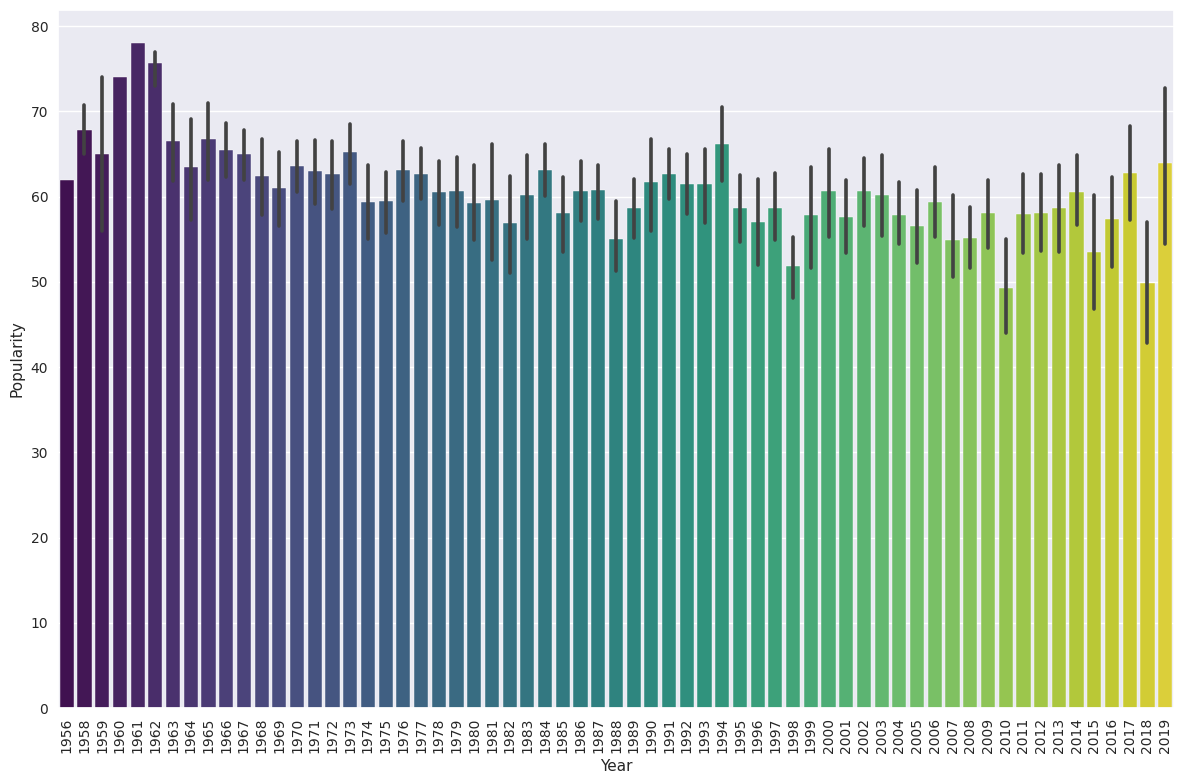

In [10]:
sns.barplot(
    df,
    x='Year',
    y='Popularity',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.tight_layout()

In [11]:
df.Artist.value_counts()

Artist
Queen                              37
The Beatles                        36
Coldplay                           27
U2                                 26
The Rolling Stones                 24
                                   ..
Percy Sledge                        1
Tim Hardin                          1
James Brown & The Famous Flames     1
Scott McKenzie                      1
Gregory Porter                      1
Name: count, Length: 731, dtype: int64

Let's group the artists and display the popularity.

In [12]:
df.groupby('Artist').agg({
    'Popularity': ['count', 'min', 'max', 'mean']
}).sort_values(('Popularity', 'count'), ascending=False)

Popularity                   
                        count min max       mean
Artist                                          
Queen                      37  29  77  56.351351
The Beatles                36  45  82  68.083333
Coldplay                   27  47  84  69.925926
U2                         26  39  80  56.769231
The Rolling Stones         24  34  78  62.333333
...                       ...  ..  ..        ...
Vitesse                     1  39  39  39.000000
WALK THE MOON               1  82  82  82.000000
Waylon                      1  39  39  39.000000
Willie Nelson               1  63  63  63.000000
Wim Sonneveld               1  15  15  15.000000

[731 rows x 4 columns]

Finally, let's display the pairplot of the dataset.

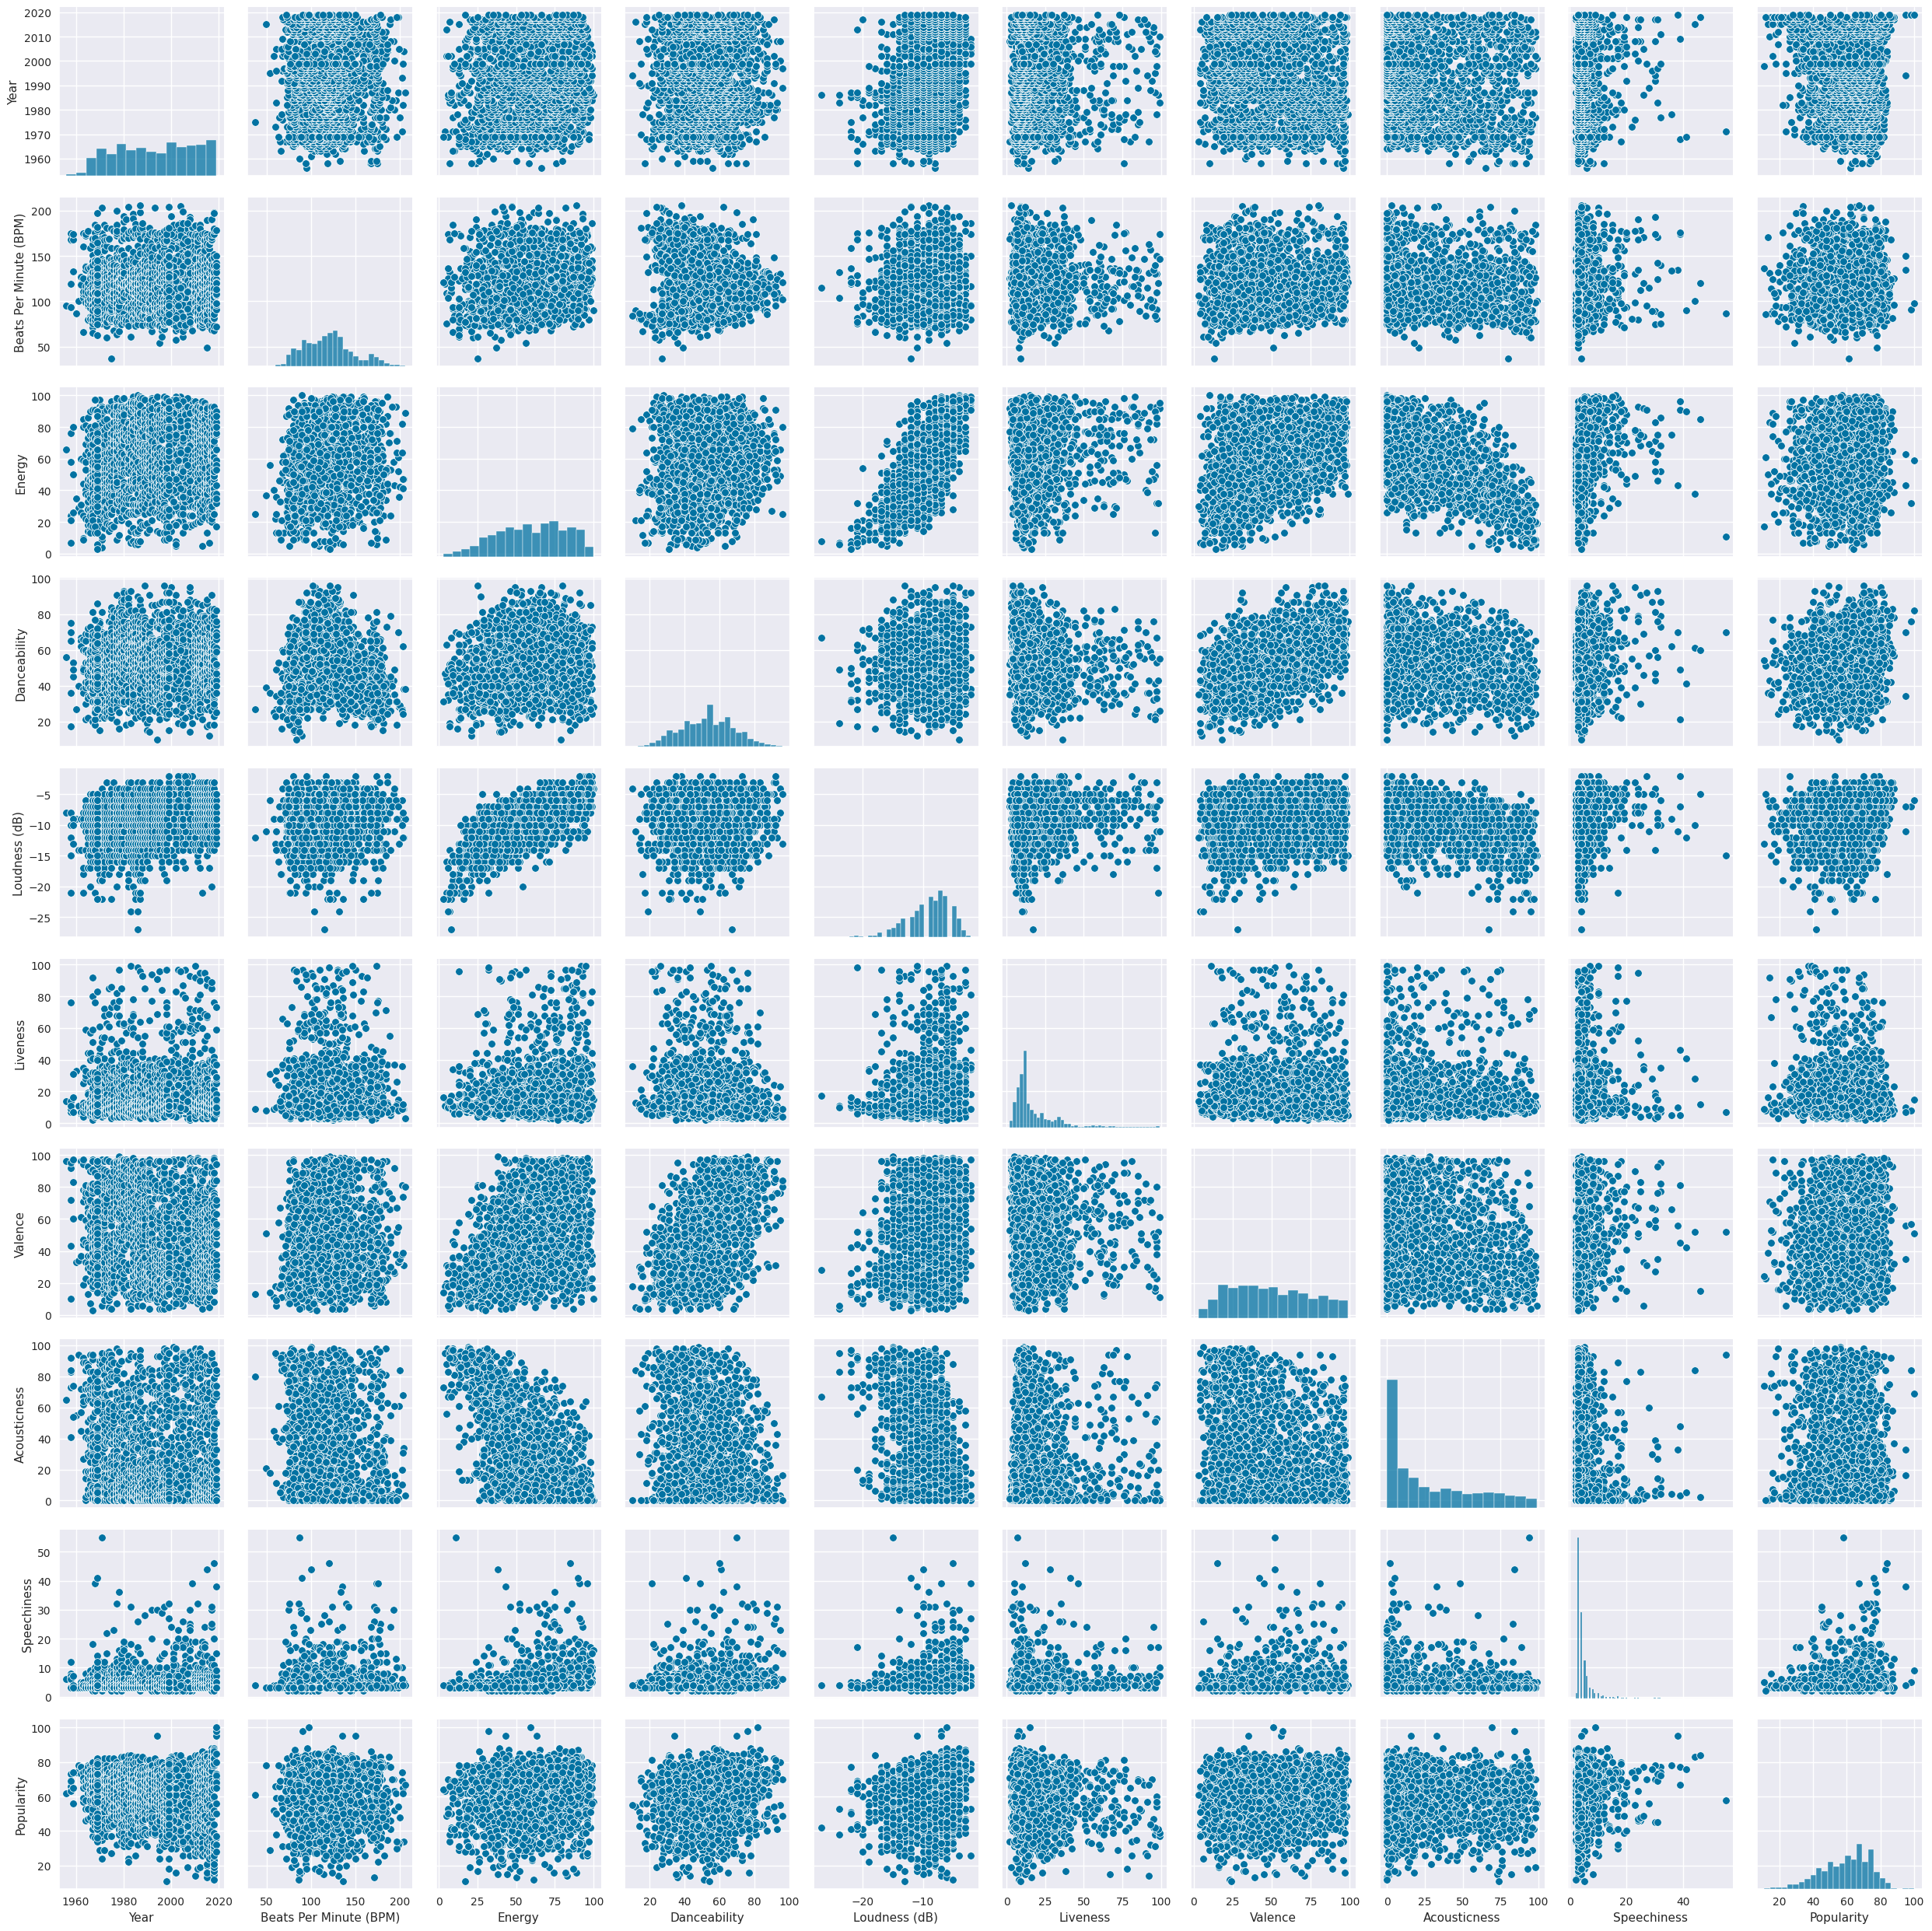

In [13]:
sns.pairplot(df)
plt.tight_layout()

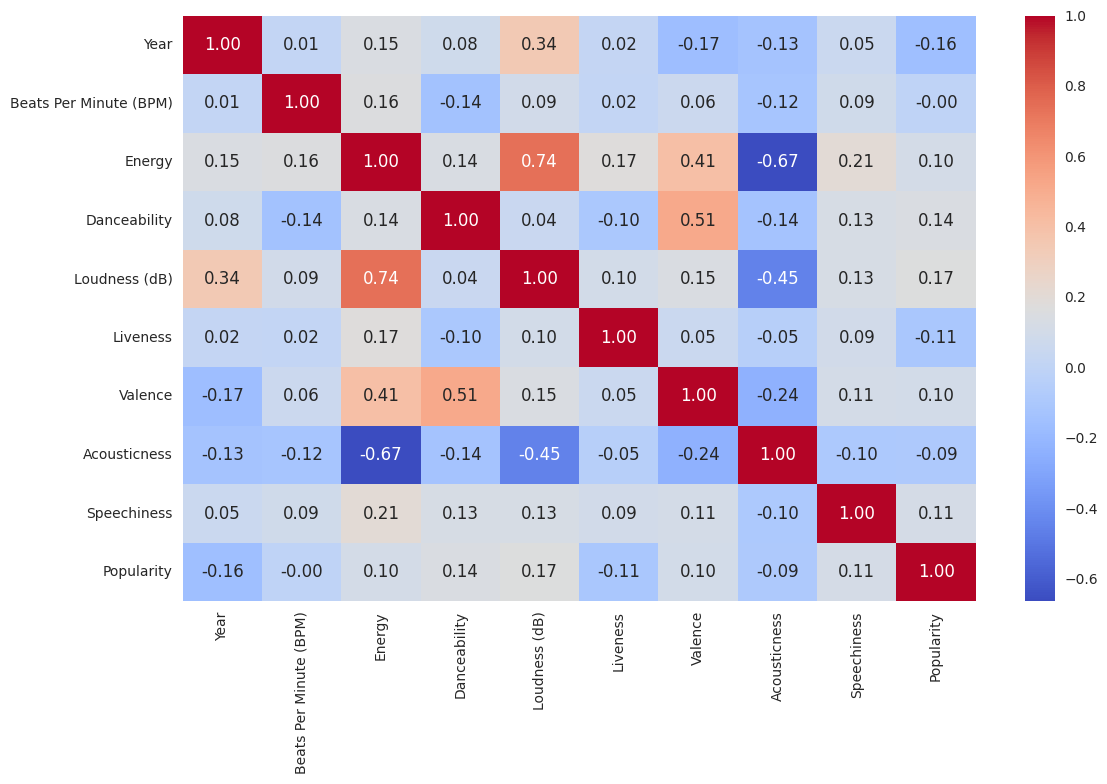

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()

## 4. Data Preprocessing
In this section, I will prepare the data for modeling, including handling categorical variables, scaling, and splitting into training and testing sets.

First of all, let's display the dtype of the columns.

In [15]:
df.dtypes

Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

Now let's convert the `Length (Duration)` column dtype to `int`. There are some values like `1,412` in the column. We need to remove the comma and convert the column to `int`.

In [16]:
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '').astype(int)

Convert the `Artist` and `Top Genre` columns to `category` dtype.

In [17]:
df['Artist'] = df['Artist'].astype('category')
df['Top Genre'] = df['Top Genre'].astype('category')

Let's define the features as `x`. We can drop the `Title` column.

In [18]:
x = df.drop(columns=['Title'])

In [19]:
# Separate categorical and numerical columns
categorical_columns = ['Artist', 'Top Genre']
numerical_columns = [col for col in x.columns if col not in categorical_columns]

Now, encode the categorical columns.

In [20]:
# Encode only the categorical columns
encoder = OrdinalEncoder()
x_encoded = encoder.fit_transform(x[categorical_columns])

Now, let's scale only the numerical features using `MinMaxScaler`, excluding the categorical columns.

In [21]:
# Scale only the numerical features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x[numerical_columns])

In [22]:
# Combine scaled numerical features with categorical features
x_final = pd.DataFrame(x_scaled, columns=numerical_columns, index=x.index)
x_final[categorical_columns] = x_encoded

In [23]:
x_final.head()

Year  Beats Per Minute (BPM)    Energy  Danceability  \
Index                                                             
1      0.761905                0.710059  0.278351      0.500000   
2      0.698413                0.579882  0.783505      0.465116   
3      0.714286                0.775148  0.680412      0.651163   
4      0.809524                0.804734  0.958763      0.383721   
5      0.730159                0.408284  0.814433      0.558140   

       Loudness (dB)  Liveness   Valence  Length (Duration)  Acousticness  \
Index                                                                       
1               0.52  0.092784  0.677083           0.081880      0.949495   
2               0.64  0.154639  0.812500           0.086429      0.171717   
3               0.72  0.051546  0.510417           0.188021      0.020202   
4               0.92  0.010309  0.354167           0.133434      0.000000   
5               0.88  0.082474  0.875000           0.123578      0.010101   

       Speechiness  Popularity  Artist  Top Genre  
Index                                              
1         0.018868    0.674157   443.0        2.0  
2         0.094340    0.314607   152.0        5.0  
3         0.283019    0.651685   250.0        8.0  
4         0.037736    0.730337   220.0        9.0  
5         0.018868    0.539326    86.0       61.0

## 5. Model Building
In this section, I will build and evaluate the K-Means clustering model. With yellowbrick library, we can evaluate the model. It finds the optimal number of clusters.

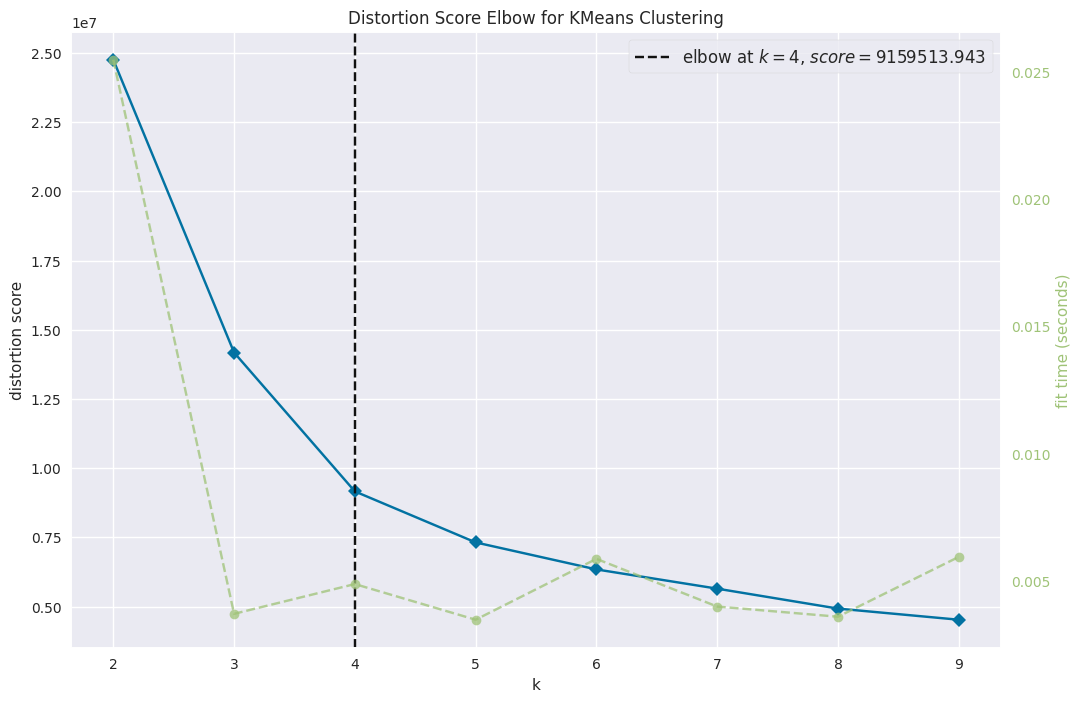

In [24]:
# Instantiate the clustering model and visualizer
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))

# Fit the data to the visualizer
visualizer.fit(x_final)
visualizer.show();

The optimal number of clusters is 4. Let's build the K-Means clustering model.

In [25]:
model = KMeans(n_clusters=4)
model.fit(x_final)

KMeans(n_clusters=4)

Let's calculate the silhouette score. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [26]:
silhouette_score(x_final, model.predict(x_final))

0.46959349267971573

## 6. Model Saving
With the model trained and evaluated, I will create a pipeline and save it using `joblib`. This allows me to easily load the model later without needing to retrain it, facilitating quick predictions on new data.

First, create a preprocessor to scale the numerical features and encode the categorical features.

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), numerical_columns),
        ('encoder', OrdinalEncoder(), categorical_columns)
    ]
)

Now, create a pipeline and fit it.

In [33]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KMeans(n_clusters=4))
])
pipeline.fit(x)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Year',
                                                   'Beats Per Minute (BPM)',
                                                   'Energy', 'Danceability',
                                                   'Loudness (dB)', 'Liveness',
                                                   'Valence',
                                                   'Length (Duration)',
                                                   'Acousticness',
                                                   'Speechiness',
                                                   'Popularity']),
                                                 ('encoder', OrdinalEncoder(),
                                                  ['Artist', 'Top Genre'])])),
                ('model', KMeans(n_clusters=4))])

Now, save the pipeline using `joblib`.

In [37]:
joblib.dump(pipeline, 'music_genres_pipeline.pkl')

['music_genres_pipeline.pkl']

Also, let's create a new dataframe with the predicted clusters to list similar songs.

In [47]:
cluster_df = pd.DataFrame({
    'Title': df['Title'],
    'Artist': df['Artist'],
    'Top Genre': df['Top Genre'],
    'Year': df['Year'],
    'Cluster': pipeline.predict(x)
})
cluster_df.head()

Title             Artist            Top Genre  Year  \
Index                                                                         
1                     Sunrise        Norah Jones      adult standards  2004   
2                 Black Night        Deep Purple           album rock  2000   
3              Clint Eastwood           Gorillaz  alternative hip hop  2001   
4               The Pretender       Foo Fighters    alternative metal  2007   
5      Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

       Cluster  
Index           
1            2  
2            3  
3            1  
4            1  
5            3

In [48]:
cluster_df.to_csv('cluster_df.csv', index=False)

## 7. Conclusion

This Music Genres Clustering project successfully demonstrates the application of unsupervised machine learning to categorize music based on acoustic features. Here's what was accomplished:

### Project Summary

**Data Analysis & Preprocessing:**
- Analyzed a Spotify dataset with 1,994 popular tracks from the 2000s
- Performed EDA to understand genre distribution and audio feature patterns
- Preprocessed data by encoding categorical variables and scaling numerical features

**Machine Learning Implementation:**
- Applied K-Means clustering with optimal 4 clusters determined by the Elbow Method
- Grouped songs based on acoustic features (BPM, Energy, Danceability, Valence, etc.)
- Created a robust pipeline using scikit-learn for model deployment

**Model Evaluation:**
- Calculated silhouette score to evaluate cluster quality
- Saved the trained model using joblib for future predictions
- Generated output dataset with song clusters for analysis

### Key Insights

The clustering approach effectively groups similar songs based on acoustic properties, making it valuable for:
- Music recommendation systems
- Automated playlist generation
- Music discovery features in streaming platforms

### Future Enhancements

- Experiment with other clustering algorithms (DBSCAN, Hierarchical Clustering)
- Add more audio features (tempo, key, time signature)
- Implement dimensionality reduction for better visualization

### Final Thoughts

This project demonstrates how machine learning can enhance music recommendation systems by grouping songs based on acoustic similarity rather than just genre labels. The clean, well-documented code provides a solid foundation for building more sophisticated music analysis tools and recommendation engines.